<a href="https://colab.research.google.com/github/Ethy17/CPE019-CPE32S9/blob/main/Assignment_8_1_Saving_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Used: https://archive.ics.uci.edu/dataset/53/iris

In [6]:
#Import and Mount Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#Install H5PY
!pip install h5py

In [25]:
#1. Save a model in HDF5 format

# MLP for Pima Indians Dataset saved to single file
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# load pima indians dataset
dataframe = pd.read_csv("/content/drive/My Drive/Assignment_8.1/iris.data", header=None)
dataset = dataframe.values

# split into input (X) and output (Y) variables
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = to_categorical(encoded_Y)

# define model
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, dummy_y, epochs=150, batch_size=10, verbose=0)

# evaluate the model
scores = model.evaluate(X, dummy_y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# save model and architecture to single file
model.save("model.h5")
print("Saved model to disk")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


compile_metrics: 98.00%
Saved model to disk


In [26]:
#2. Save a model and load the model in a JSON format

# MLP for Pima Indians Dataset Serialize to JSON and HDF5
import pandas as pd
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense
import numpy
import os
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# fix random seed for reproducibility
numpy.random.seed(7)

# load pima indians dataset
dataframe = pd.read_csv("/content/drive/My Drive/Assignment_8.1/iris.data", header=None)
dataset = dataframe.values

# split into input (X) and output (Y) variables
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = to_categorical(encoded_Y)

# define model
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, dummy_y, epochs=150, batch_size=10, verbose=0)

# evaluate the model
scores = model.evaluate(X, dummy_y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/Assignment_8.1/model.weights.h5")
print("Saved model to disk")

# later...

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("/content/drive/My Drive/Assignment_8.1/model.weights.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, dummy_y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


compile_metrics: 98.00%
Saved model to disk
Loaded model from disk
compile_metrics: 98.00%


In [29]:
#3. Save a model and load the model in a YAML format

# MLP for Pima Indians Dataset serialize to YAML and HDF5
import pandas as pd
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense
import numpy
import os
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load pima indians dataset
dataframe = pd.read_csv("/content/drive/My Drive/Assignment_8.1/iris.data", header=None)
dataset = dataframe.values

# split into input (X) and output (Y) variables
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = to_categorical(encoded_Y)

# define model
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, dummy_y, epochs=150, batch_size=10, verbose=0)

# evaluate the model
scores = model.evaluate(X, dummy_y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# serialize model to YAML
model_yaml = model.to_json()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)

# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/Assignment_8.1/model_yaml.weights.h5")
print("Saved model to disk")

# later...

# load YAML and create model
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_json(loaded_model_yaml)

# load weights into new model
loaded_model.load_weights("/content/drive/My Drive/Assignment_8.1/model_yaml.weights.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, dummy_y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


compile_metrics: 98.00%
Saved model to disk
Loaded model from disk
compile_metrics: 98.00%


In [32]:
#4. Checkpoint Neural Network Model Improvements

# Checkpoint the weights when validation accuracy improves
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

seed = 42
tf.random.set_seed(seed)

# load pima indians dataset
dataframe = pd.read_csv("/content/drive/My Drive/Assignment_8.1/iris.data", header=None)
dataset = dataframe.values

# split into input (X) and output (Y) variables
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = to_categorical(encoded_Y)

# create model
model = Sequential()
model.add(Dense(16, input_shape=(4,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Fit the model
model.fit(X, dummy_y, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to weights-improvement-01-0.00.keras

Epoch 2: val_accuracy did not improve from 0.00000

Epoch 3: val_accuracy did not improve from 0.00000

Epoch 4: val_accuracy did not improve from 0.00000

Epoch 5: val_accuracy did not improve from 0.00000

Epoch 6: val_accuracy did not improve from 0.00000

Epoch 7: val_accuracy did not improve from 0.00000

Epoch 8: val_accuracy did not improve from 0.00000

Epoch 9: val_accuracy did not improve from 0.00000

Epoch 10: val_accuracy did not improve from 0.00000

Epoch 11: val_accuracy did not improve from 0.00000

Epoch 12: val_accuracy did not improve from 0.00000

Epoch 13: val_accuracy did not improve from 0.00000

Epoch 14: val_accuracy did not improve from 0.00000

Epoch 15: val_accuracy did not improve from 0.00000

Epoch 16: val_accuracy did not improve from 0.00000

Epoch 17: val_accuracy did not improve from 0.00000

Epoch 18: val_accuracy did not improve from 0.00000

Ep

In [35]:
#5. Checkpoint Best Neural Network Model only

# Checkpoint the weights for best model on validation accuracy
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# load pima indians dataset
dataframe = pd.read_csv("/content/drive/My Drive/Assignment_8.1/iris.data", header=None)
dataset = dataframe.values

# split into input (X) and output (Y) variables
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = to_categorical(encoded_Y)

# create model
model = Sequential()
model.add(Dense(16, input_shape=(4,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# checkpoint
filepath="weights.best.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Fit the model
model.fit(X, dummy_y, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_accuracy improved from -inf to 0.62000, saving model to weights.best.keras

Epoch 2: val_accuracy did not improve from 0.62000

Epoch 3: val_accuracy did not improve from 0.62000

Epoch 4: val_accuracy did not improve from 0.62000

Epoch 5: val_accuracy did not improve from 0.62000

Epoch 6: val_accuracy did not improve from 0.62000

Epoch 7: val_accuracy did not improve from 0.62000

Epoch 8: val_accuracy did not improve from 0.62000

Epoch 9: val_accuracy did not improve from 0.62000

Epoch 10: val_accuracy did not improve from 0.62000

Epoch 11: val_accuracy did not improve from 0.62000

Epoch 12: val_accuracy did not improve from 0.62000

Epoch 13: val_accuracy did not improve from 0.62000

Epoch 14: val_accuracy did not improve from 0.62000

Epoch 15: val_accuracy did not improve from 0.62000

Epoch 16: val_accuracy did not improve from 0.62000

Epoch 17: val_accuracy did not improve from 0.62000

Epoch 18: val_accuracy did not improve from 0.62000

Epoch 19: val_acc

In [37]:
#6. Load a saved Neural Network model

import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
model = Sequential()
model.add(Dense(16, input_dim=4, kernel_initializer = 'uniform' , activation= 'relu' ))
model.add(Dense(8, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(3, kernel_initializer= 'uniform' , activation= 'sigmoid' ))
# load weights
model.load_weights("weights.best.keras")
# Compile model (required to make predictions)
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
print("Created model and loaded weights from file")
# load pima indians dataset
dataframe = pd.read_csv("/content/drive/My Drive/Assignment_8.1/iris.data", header=None)
dataset = dataframe.values

# split into input (X) and output (Y) variables
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = to_categorical(encoded_Y)

# estimate accuracy on whole dataset using loaded weights
scores = model.evaluate(X, dummy_y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Created model and loaded weights from file
compile_metrics: 30.67%


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


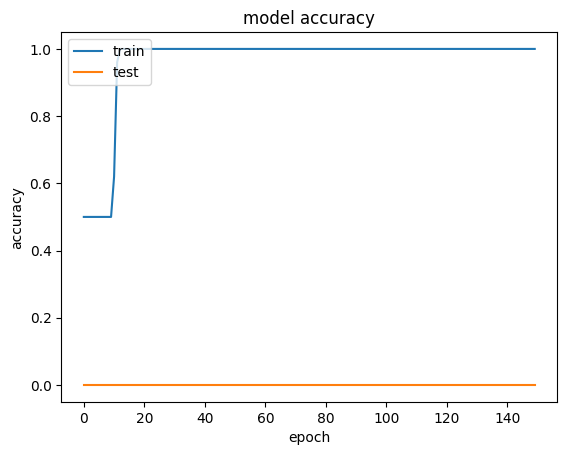

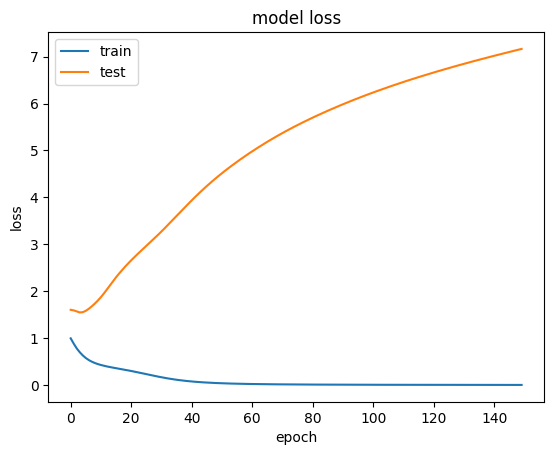

In [38]:
#7. Visualize Model Training History in Keras

# Visualize training history
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# load pima indians dataset
dataframe = pd.read_csv("/content/drive/My Drive/Assignment_8.1/iris.data", header=None)
dataset = dataframe.values

# split into input (X) and output (Y) variables
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = to_categorical(encoded_Y)

# create model
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X, dummy_y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)


# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
!pip install scikeras

In [42]:
#8. Show the application of Dropout Regularization

# Baseline Model on the Sonar Dataset
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# load dataset
dataframe = pd.read_csv("/content/drive/My Drive/Assignment_8.1/iris.data", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# baseline
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(16, input_shape=(4,), activation='relu'))
	model.add(Dense(8,  activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.01, momentum=0.8)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_baseline, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Baseline: 33.33% (0.00%)


In [44]:
#9. Show the application of Dropout on the visible layer

# Example of Dropout on the Sonar Dataset: Visible Layer
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# load dataset
dataframe = pd.read_csv("/content/drive/My Drive/Assignment_8.1/iris.data", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# dropout in the input layer with weight constraint
def create_model():
	# create model
	model = Sequential()
	model.add(Dropout(0.2, input_shape=(4,)))
	model.add(Dense(16, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dense(8, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.1, momentum=0.9)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_model, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Visible: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: 

Visible: 33.33% (0.00%)


In [45]:
#10. Show the application of Dropout on the hidden layer

# Example of Dropout on the Sonar Dataset: Hidden Layer
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# load dataset
dataframe = pd.read_csv("/content/drive/My Drive/Assignment_8.1/iris.data", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# dropout in hidden layers with weight constraint
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(16, input_shape=(4,), activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dropout(0.2))
	model.add(Dense(8, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dropout(0.2))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.1, momentum=0.9)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_model, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Hidden: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Hidden: 33.33% (0.00%)


In [47]:
!pip install tf_keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.2.1
    Uninstalling keras-3.2.1:
      Successfully uninstalled keras-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires keras>=3.2.0, but you have keras 2.15.0 which is incompatible.


In [1]:
#11. Show the application of a time-based learning rate schedule

# Time Based Learning Rate Decay
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# tf.keras.optimizers.legacy.SGD
from tensorflow.keras.optimizers.legacy import SGD
from sklearn.preprocessing import LabelEncoder
# load dataset
dataframe = pd.read_csv("/content/drive/My Drive/Assignment_8.1/iris.data", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
# create model
model = Sequential()
model.add(Dense(4, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
epochs = 50
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=epochs, batch_size=28, verbose=2)

Epoch 1/50
4/4 - 4s - loss: 0.6792 - accuracy: 0.7300 - val_loss: 0.7153 - val_accuracy: 0.0000e+00 - 4s/epoch - 1s/step
Epoch 2/50
4/4 - 0s - loss: 0.4610 - accuracy: 0.8100 - val_loss: -6.5358e-01 - val_accuracy: 0.0000e+00 - 350ms/epoch - 88ms/step
Epoch 3/50
4/4 - 0s - loss: 0.2040 - accuracy: 1.0000 - val_loss: -3.0065e+00 - val_accuracy: 0.0000e+00 - 228ms/epoch - 57ms/step
Epoch 4/50
4/4 - 0s - loss: 0.0608 - accuracy: 1.0000 - val_loss: -5.9699e+00 - val_accuracy: 0.0000e+00 - 305ms/epoch - 76ms/step
Epoch 5/50
4/4 - 0s - loss: 0.0193 - accuracy: 1.0000 - val_loss: -7.3860e+00 - val_accuracy: 0.0000e+00 - 298ms/epoch - 74ms/step
Epoch 6/50
4/4 - 0s - loss: 0.0086 - accuracy: 1.0000 - val_loss: -8.4000e+00 - val_accuracy: 0.0000e+00 - 324ms/epoch - 81ms/step
Epoch 7/50
4/4 - 0s - loss: 0.0061 - accuracy: 1.0000 - val_loss: -8.6514e+00 - val_accuracy: 0.0000e+00 - 227ms/epoch - 57ms/step
Epoch 8/50
4/4 - 0s - loss: 0.0047 - accuracy: 1.0000 - val_loss: -8.7296e+00 - val_accuracy:

In [2]:
#12. Show the application of a drop-based learning rate schedule

# Drop-Based Learning Rate Decay
import pandas as pd
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import LearningRateScheduler

# learning rate schedule
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

# load dataset
dataframe = pd.read_csv("/content/drive/My Drive/Assignment_8.1/iris.data", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
# create model
model = Sequential()
model.add(Dense(4, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
sgd = SGD(learning_rate=0.0, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# learning schedule callback
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=50, batch_size=28, callbacks=callbacks_list, verbose=2)

Epoch 1/50
4/4 - 5s - loss: 0.7167 - accuracy: 0.5300 - val_loss: 0.8492 - val_accuracy: 0.0000e+00 - lr: 0.1000 - 5s/epoch - 1s/step
Epoch 2/50
4/4 - 0s - loss: 0.5958 - accuracy: 0.5000 - val_loss: 1.1172 - val_accuracy: 0.0000e+00 - lr: 0.1000 - 253ms/epoch - 63ms/step
Epoch 3/50
4/4 - 0s - loss: 0.5236 - accuracy: 0.5000 - val_loss: 0.8307 - val_accuracy: 0.0000e+00 - lr: 0.1000 - 187ms/epoch - 47ms/step
Epoch 4/50
4/4 - 0s - loss: 0.3682 - accuracy: 0.7000 - val_loss: 0.1898 - val_accuracy: 0.0000e+00 - lr: 0.1000 - 155ms/epoch - 39ms/step
Epoch 5/50
4/4 - 0s - loss: 0.2579 - accuracy: 1.0000 - val_loss: -5.5773e-01 - val_accuracy: 0.0000e+00 - lr: 0.1000 - 202ms/epoch - 51ms/step
Epoch 6/50
4/4 - 0s - loss: 0.1543 - accuracy: 1.0000 - val_loss: -1.2361e+00 - val_accuracy: 0.0000e+00 - lr: 0.1000 - 185ms/epoch - 46ms/step
Epoch 7/50
4/4 - 0s - loss: 0.0993 - accuracy: 1.0000 - val_loss: -1.8025e+00 - val_accuracy: 0.0000e+00 - lr: 0.1000 - 192ms/epoch - 48ms/step
Epoch 8/50
4/4 - 

#Conclusion:

My conclusion towards this assignment / activity is that i am confused and i think that i did not achieve the correct output for this activity as i tried to use multiple / different datasets and still failed to get the correct values. as for learnings on this assignment / activity i can say that i have learn mostly read the correct usage and outputs of this activity on the given learning topic / instruction material for this assignment.